# Process raw MiSeq V4 data using dada2

based on tutorials:<br>
 https://benjjneb.github.io/dada2/tutorial.html<br>
 https://benjjneb.github.io/dada2/bigdata.html

## Load libraries

In [1]:
library(dada2); packageVersion("dada2")
library(repr)
library(ggplot2)

Loading required package: Rcpp


[1] ‘1.12.1’

## Examine read quality

In [2]:
path <- "~/data/awtp2_16S/untrimmed/unzipped_tests/"
list.files(path)

[1] "KNLK_SD001_S1_L001_R1_001.fastq"        
 [2] "KNLK_SD001_S1_L001_R2_001.fastq"        
 [3] "KNLK_SD009_S9_L001_R1_001.fastq"        
 [4] "KNLK_SD009_S9_L001_R1_001.trimmed.fastq"
 [5] "KNLK_SD009_S9_L001_R2_001.fastq"        
 [6] "KNLK_SD028_S28_L001_R1_001.fastq"       
 [7] "KNLK_SD028_S28_L001_R2_001.fastq"       
 [8] "KNLK_SD033_S33_L001_R1_001.fastq"       
 [9] "KNLK_SD033_S33_L001_R2_001.fastq"       
[10] "KNLK_SD205_S205_L001_R1_001.fastq"      
[11] "KNLK_SD205_S205_L001_R2_001.fastq"      
[12] "KNLK_SD217_S217_L001_R2_001.fastq"

In [9]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 2)
sample.names

[1] "SD009" "SD028" "SD033"

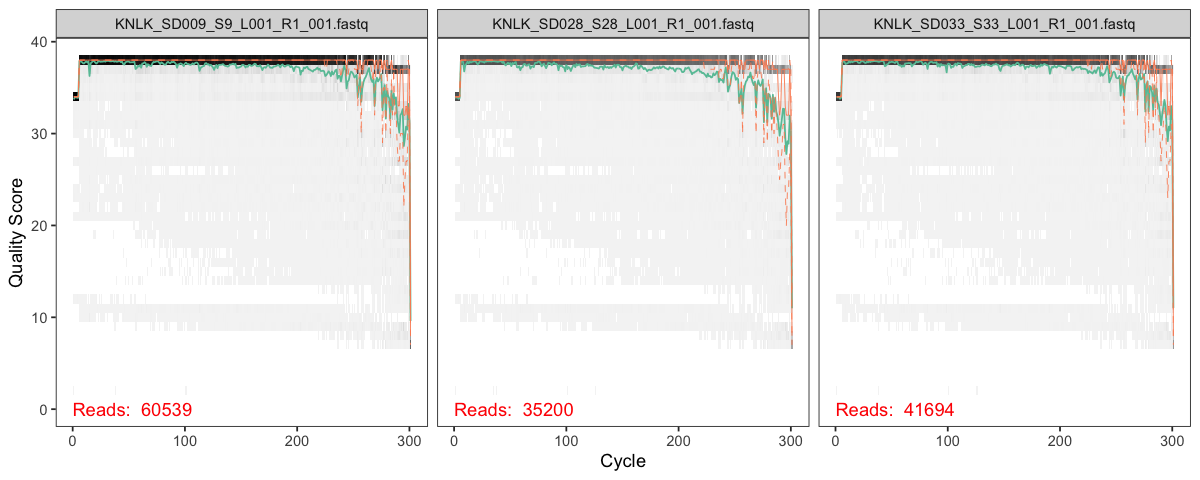

In [17]:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[1:6])

Warning message:
“Removed 7135 rows containing missing values (geom_tile).”Warning message:
“Removed 276 rows containing missing values (geom_path).”Warning message:
“Removed 276 rows containing missing values (geom_path).”Warning message:
“Removed 276 rows containing missing values (geom_path).”Warning message:
“Removed 276 rows containing missing values (geom_path).”

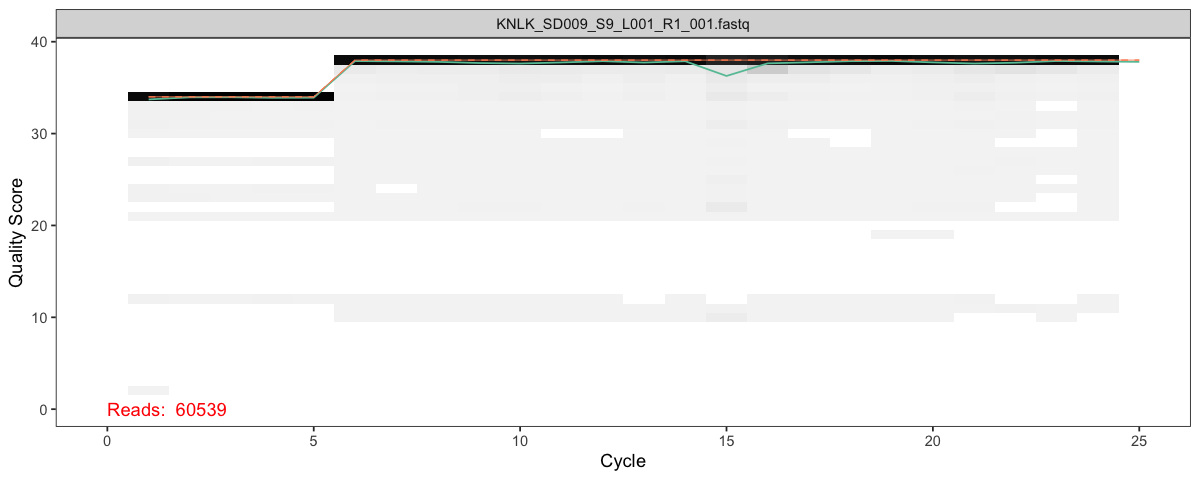

In [22]:
#zoom in on one:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[1:1])+
xlim(0,25)

Warning message:
“Removed 4663 rows containing missing values (geom_tile).”Warning message:
“Removed 200 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

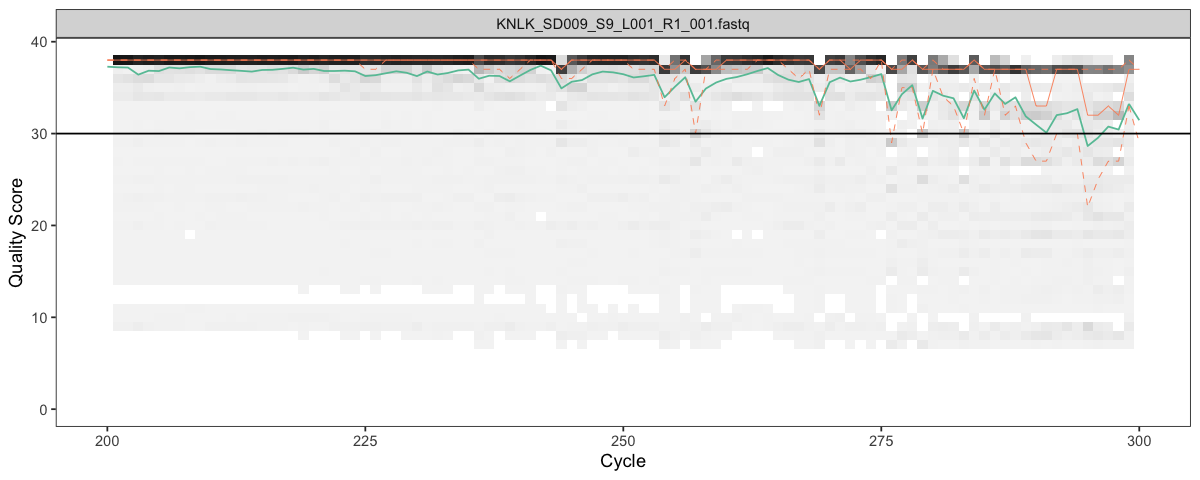

In [31]:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[1:1])+
xlim(200,300)+
geom_hline(aes(yintercept=30))

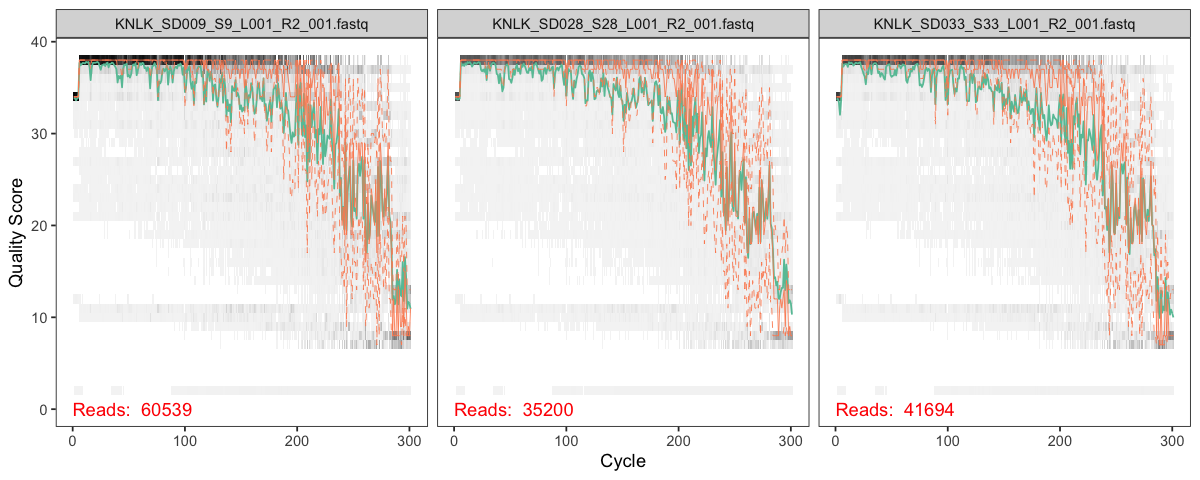

In [19]:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnRs[1:6])

## Trim and filter reads

In [35]:
path <- "~/data/awtp2_16S/untrimmed/fwd/"
filtpath <- "~/data/awtp2_16S/trimmed_fwd/"
fns <- list.files(path, pattern="fastq.gz")

# Filtering
filterAndTrim(fwd = file.path(path,fns), filt = file.path(filtpath,fns), compress = TRUE,
  truncQ = 10, truncLen = 251, trimLeft = 5,
  minLen = 200, maxN = 0, minQ = 0, maxEE = 1, rm.phix = TRUE,
  n = 1e+05)


## Infer sequence variants

In [3]:
filtpath <- "~/data/awtp2_16S/trimmed_fwd/"
filts <- list.files(filtpath, pattern="fastq.gz", full.names=TRUE)
sample.names <- sapply(strsplit(basename(filts), "_"), `[`, 2)
names(filts) <- sample.names

sample.names

[1] "SD001" "SD002" "SD003" "SD004" "SD005" "SD006" "SD007" "SD008" "SD009"
 [10] "SD010" "SD011" "SD012" "SD013" "SD014" "SD015" "SD016" "SD017" "SD018"
 [19] "SD019" "SD020" "SD021" "SD022" "SD023" "SD024" "SD025" "SD026" "SD027"
 [28] "SD028" "SD029" "SD030" "SD031" "SD032" "SD033" "SD034" "SD035" "SD036"
 [37] "SD037" "SD038" "SD039" "SD040" "SD041" "SD042" "SD043" "SD044" "SD045"
 [46] "SD046" "SD047" "SD048" "SD049" "SD050" "SD051" "SD052" "SD053" "SD054"
 [55] "SD055" "SD056" "SD057" "SD058" "SD059" "SD060" "SD061" "SD062" "SD063"
 [64] "SD064" "SD065" "SD066" "SD067" "SD068" "SD069" "SD070" "SD071" "SD072"
 [73] "SD073" "SD074" "SD075" "SD076" "SD077" "SD078" "SD079" "SD080" "SD081"
 [82] "SD082" "SD083" "SD084" "SD085" "SD086" "SD087" "SD088" "SD089" "SD090"
 [91] "SD091" "SD092" "SD093" "SD094" "SD095" "SD096" "SD097" "SD098" "SD099"
[100] "SD100" "SD101" "SD102" "SD103" "SD104" "SD105" "SD106" "SD107" "SD108"
[109] "SD109" "SD110" "SD111" "SD112" "SD113" "SD114" "SD115" "SD116" "SD117"
[118] "SD118" "SD119" "SD120" "SD121" "SD122" "SD123" "SD124" "SD125" "SD126"
[127] "SD127" "SD128" "SD129" "SD130" "SD131" "SD132" "SD133" "SD134" "SD135"
[136] "SD136" "SD137" "SD138" "SD139" "SD140" "SD141" "SD142" "SD143" "SD144"
[145] "SD145" "SD146" "SD147" "SD148" "SD149" "SD150" "SD151" "SD152" "SD153"
[154] "SD154" "SD155" "SD156" "SD157" "SD158" "SD159" "SD160" "SD161" "SD162"
[163] "SD163" "SD164" "SD165" "SD166" "SD167" "SD168" "SD169" "SD170" "SD171"
[172] "SD172" "SD173" "SD174" "SD175" "SD176" "SD177" "SD178" "SD179" "SD180"
[181] "SD181" "SD182" "SD183" "SD184" "SD185" "SD186" "SD187" "SD188" "SD189"
[190] "SD190" "SD191" "SD192" "SD193" "SD194" "SD195" "SD196" "SD197" "SD198"
[199] "SD199" "SD200" "SD201" "SD202" "SD203" "SD204" "SD205" "SD206" "SD207"
[208] "SD208" "SD209" "SD210" "SD211" "SD212" "SD213" "SD214" "SD215" "SD216"
[217] "SD217" "SD218"

1001308560 total bases in 4070360 reads from 119 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

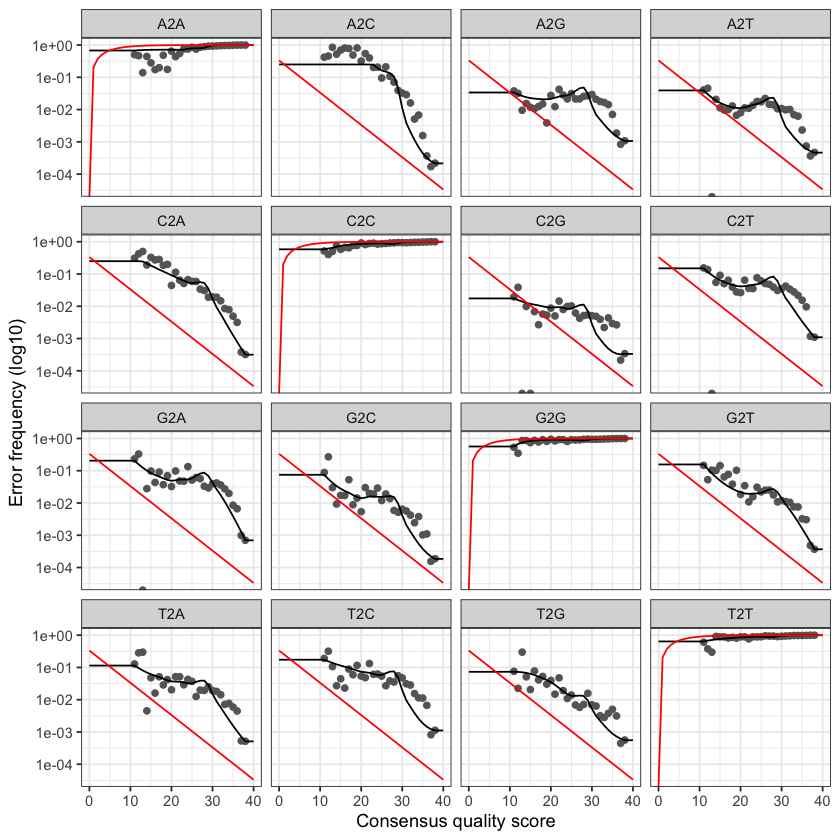

In [4]:
# Learn error rates
set.seed(100)
err <- learnErrors(filts, nbases = 1e9, multithread=TRUE, randomize=TRUE)
plotErrors(err, nominalQ=TRUE)

In [5]:
ggsave('~/data/awtp2_16S/dada2_estimated_error_rates1e9.pdf', device='pdf')

Saving 7 x 7 in image
Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

In [6]:
# Infer sequence variants
dds <- vector("list", length(sample.names))
names(dds) <- sample.names
for(sam in sample.names) {
  cat("Processing:", sam, "\n")
  derep <- derepFastq(filts[[sam]])
  dds[[sam]] <- dada(derep, err=err, multithread=TRUE)
}

Processing: SD001 
Sample 1 - 18038 reads in 737 unique sequences.
Processing: SD002 
Sample 1 - 37890 reads in 895 unique sequences.
Processing: SD003 
Sample 1 - 43377 reads in 6940 unique sequences.
Processing: SD004 
Sample 1 - 28780 reads in 2072 unique sequences.
Processing: SD005 
Sample 1 - 29253 reads in 3144 unique sequences.
Processing: SD006 
Sample 1 - 23306 reads in 5727 unique sequences.
Processing: SD007 
Sample 1 - 27880 reads in 2903 unique sequences.
Processing: SD008 
Sample 1 - 14253 reads in 2026 unique sequences.
Processing: SD009 
Sample 1 - 48412 reads in 9837 unique sequences.
Processing: SD010 
Sample 1 - 47065 reads in 6748 unique sequences.
Processing: SD011 
Sample 1 - 38818 reads in 4008 unique sequences.
Processing: SD012 
Sample 1 - 37835 reads in 4685 unique sequences.
Processing: SD013 
Sample 1 - 25837 reads in 2039 unique sequences.
Processing: SD014 
Sample 1 - 35684 reads in 4151 unique sequences.
Processing: SD015 
Sample 1 - 30870 reads in 4881 

In [7]:
# Construct sequence table and write to disk
seqtab <- makeSequenceTable(dds)
saveRDS(seqtab, "~/data/awtp2_16S/seqtabn1e9.rds")

In [8]:
dim(seqtab)

[1]   218 14503

There were 15692 sequences when learnErrors was run with nbases=1e8.

## Remove chimeras

In [9]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)

Identified 7232 bimeras out of 14503 input sequences.


In [10]:
dim(seqtab.nochim)

[1]  218 7271

There were 7521 nonchimeric sequences when learnErrors was run with nbases=1e8.

,Row.names,reads_filtered,reads_nochim,percent_chim
,<I<chr>>,<dbl>,<dbl>,<dbl>
114,SD114,12395,7661,38.19282
129,SD129,27926,17066,38.88849
150,SD150,34910,15730,54.94128
37,SD037,36618,15687,57.16041
39,SD039,29963,12579,58.01822
119,SD119,35421,14165,60.00960


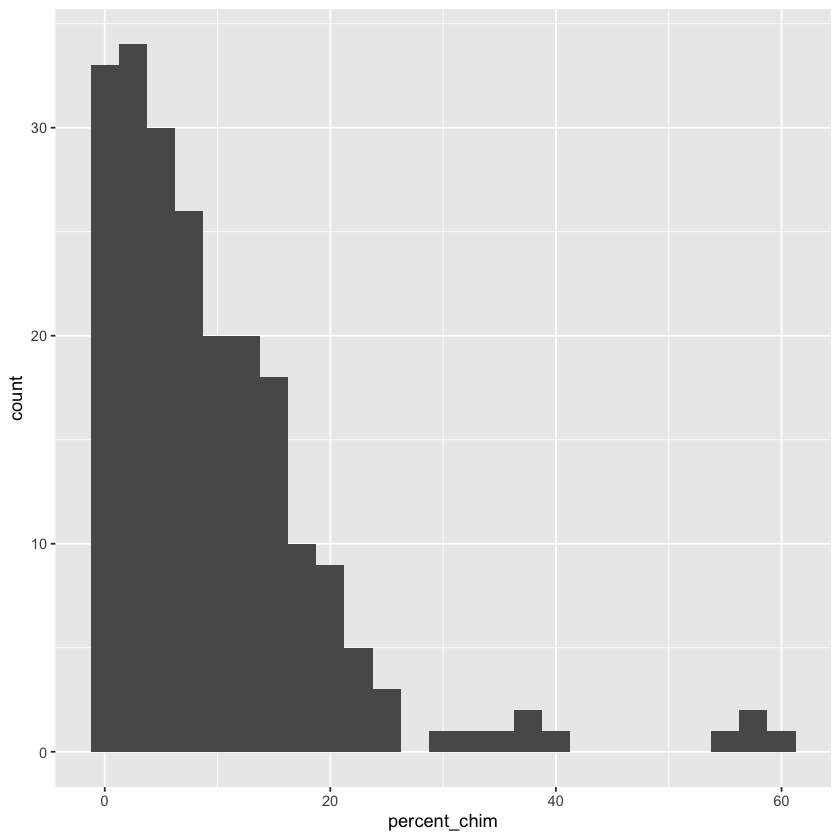

In [11]:
# investigate the percent of total reads that were chimeric
reads_filtered <- as.data.frame(rowSums(seqtab))
colnames(reads_filtered) <- 'reads_filtered'
reads_nochim <- as.data.frame(rowSums(seqtab.nochim))
colnames(reads_nochim) <- 'reads_nochim'
stats <- merge(reads_filtered, reads_nochim, by=0)
stats$percent_chim <- 100 * (stats$reads_filtered - stats$reads_nochim) / stats$reads_filtered
tail(stats[order(stats$percent_chim), ])
ggplot(stats, aes(x=percent_chim))+
    geom_histogram(binwidth=2.5)


Four samples had a very high percentage of chimeric reads.

## Assign taxonomy

In [12]:
tax <- assignTaxonomy(seqtab.nochim, "~/data/refs/silva_nr_v132_train_set.fa.gz", multithread=TRUE)

In [13]:
# Write to disk
saveRDS(seqtab.nochim, "~/data/awtp2_16S/seqtab_finaln1e9.rds")
saveRDS(tax, "~/data/awtp2_16S/tax_finaln1e9.rds")